In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from warnings import filterwarnings
filterwarnings('ignore')
import cartopy.crs as ccrs
import cartopy.feature as cfeature 

In [2]:
data = xr.open_mfdataset('C:/Users/Joseph Owusu/Desktop/DR Aryee/Pomaa/*.nc')
eritrea = data.where(data != -99.0)

In [3]:
eritrea_data = eritrea.precip
eritrea.precip

<xarray.DataArray 'precip' (datetime: 3288, lat: 25, lon: 29)>
dask.array<where, shape=(3288, 25, 29), dtype=float32, chunksize=(366, 25, 29), chunktype=numpy.ndarray>
Coordinates:
  * lon       (lon) float32 36.25 36.5 36.75 37.0 ... 42.5 42.75 43.0 43.25
  * lat       (lat) float32 18.5 18.25 18.0 17.75 17.5 ... 13.25 13.0 12.75 12.5
  * datetime  (datetime) datetime64[ns] 2000-09-01 2000-09-02 ... 2009-09-01
Attributes:
    grid_mapping:  crs

In [4]:
monthly_data = eritrea_data.groupby('datetime.month')
yearly_data = eritrea_data.groupby('datetime.year')

In [5]:
#Question 1
# monthly rainfall totals
mon_rainfall_totals = monthly_data.sum('datetime')

# monthly climatologies rainfall totals
mon_mean_climo_totals = monthly_data.sum('datetime').mean('month')

In [6]:
#Question 2
# annual totals
annual_totals = yearly_data.sum()

# annual climatology totals
annual_climo_totals = yearly_data.sum('datetime').mean('year')

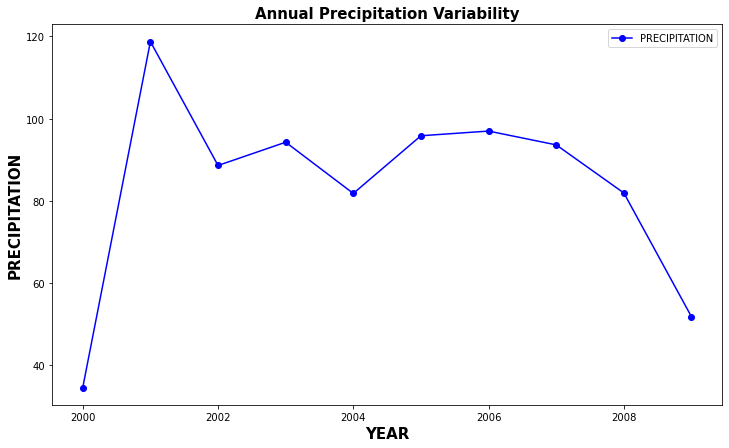

In [7]:
#Question 2
#plotting time series for annual climatologies
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,annual_totals.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
ax.set_title('Annual Precipitation Variability', fontweight = 'bold', fontsize=15 ,color = 'Black')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 15, color= 'Black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'Black')
plt.legend()
# plt.show()
plt.savefig('1.jpeg');

In [9]:
#Question 3
#DRY days per year
dryDays_per_year = eritrea_data.where(eritrea_data < 1).groupby('datetime.year').count('datetime')

#WET days per year
wetDays_per_year = eritrea_data.where(eritrea_data >= 1).groupby('datetime.year').count('datetime')

#DRY days per MONTH
dryDays_per_month = eritrea_data.where(eritrea_data < 1).groupby('datetime.month').count('datetime')

#WET days per MONTH
wetDays_per_month = eritrea_data.where(eritrea_data >= 1).groupby('datetime.month').count('datetime')

#Question 4
# Extreme Rainfall >10mm per year
Xrain10 = eritrea_data.where(eritrea_data > 10).groupby('datetime.year').count('datetime')

# Extreme Rainfall >20mm per year
Xrain20 = eritrea_data.where(eritrea_data > 20).groupby('datetime.year').count('datetime')

# Extreme Rainfall >10mm per month
Xrain10M = eritrea_data.where(eritrea_data > 10).groupby('datetime.month').count('datetime')

# Extreme Rainfall >10mm per month
Xrain20M = eritrea_data.where(eritrea_data > 20).groupby('datetime.month').count('datetime')




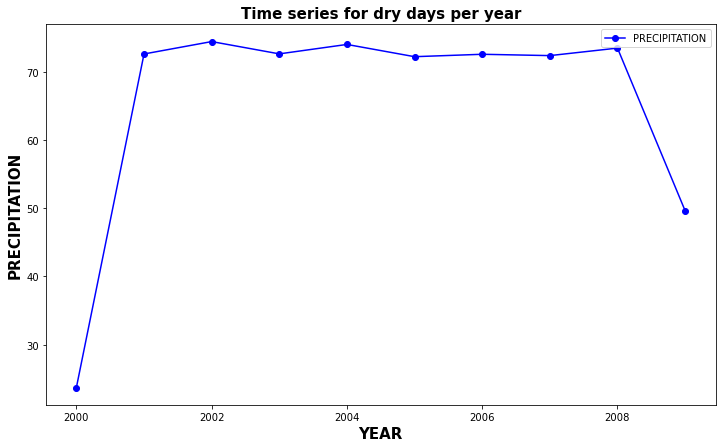

In [10]:
#plotting time series for drydays per year
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,dryDays_per_year.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
ax.set_title('Time series for dry days per year', fontweight = 'bold', fontsize=15 ,color = 'Black')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 15, color= 'Black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'Black')
plt.legend()
# plt.show()
plt.savefig('2.jpeg');

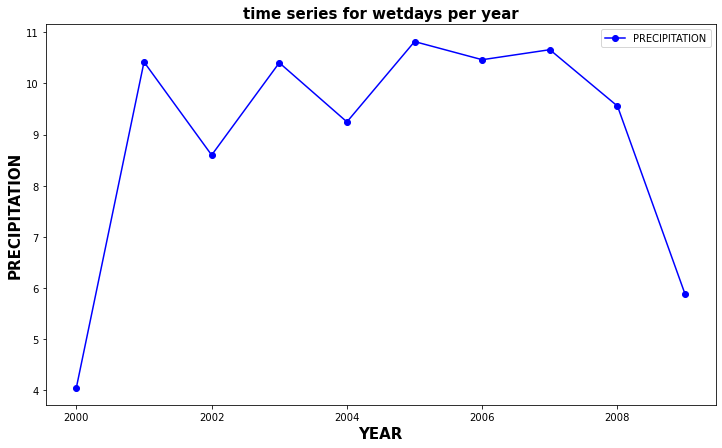

In [11]:
#plotting time series for wetdays per year
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,wetDays_per_year.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
ax.set_title('time series for wetdays per year', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 15, color= 'Black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
# plt.show()
plt.savefig('3.jpeg');

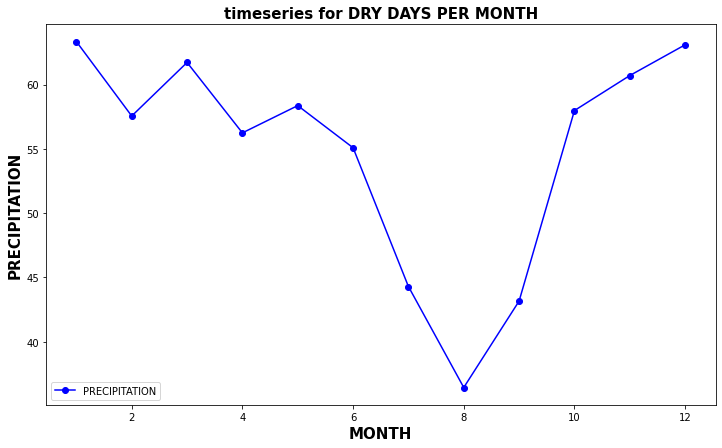

In [12]:
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(mon_rainfall_totals.month,dryDays_per_month.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
ax.set_title('timeseries for DRY DAYS PER MONTH', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("MONTH", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
# plt.show()
plt.savefig('4.jpeg');

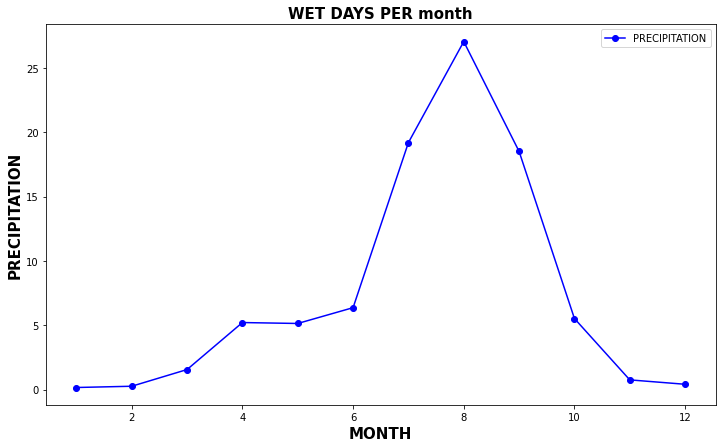

In [13]:
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(mon_rainfall_totals.month,wetDays_per_month.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
ax.set_title('WET DAYS PER month', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("MONTH", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
# plt.show()
plt.savefig('5.jpeg');

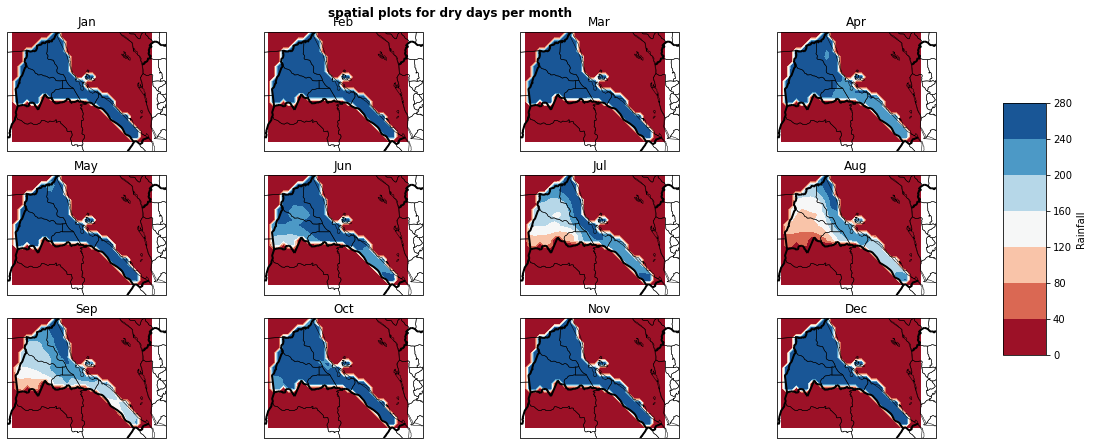

In [14]:
# spatial plots for dry days per month
fig,ax=plt.subplots(3,4,figsize=(24,7), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([36.0, 44.0, 12.0, 18.0])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(dryDays_per_month.lon, dryDays_per_month.lat, dryDays_per_month[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Rainfall')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for dry days per month', fontweight='bold');
plt.savefig('6.jpeg');

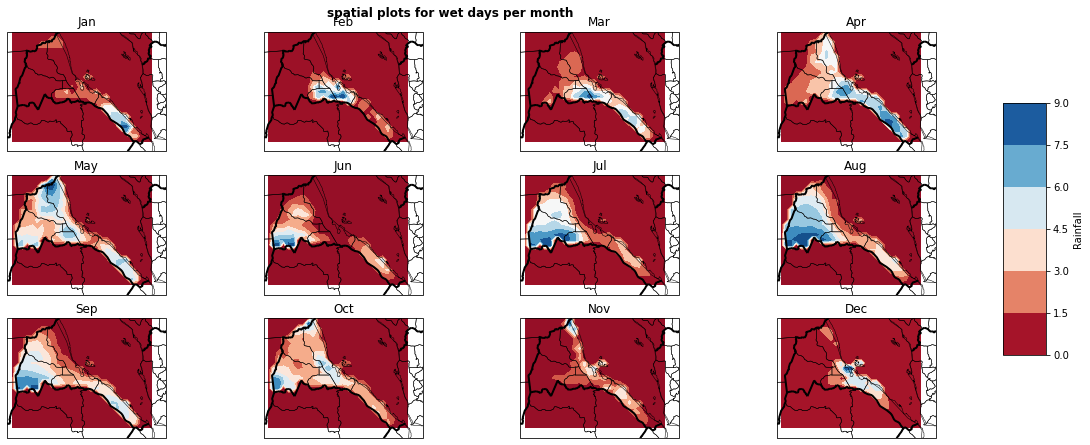

In [15]:
# spatial plots for wet days per month
fig,ax=plt.subplots(3,4,figsize=(24,7), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([36.0, 44.0, 12.0, 18.0])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wetDays_per_month.lon, wetDays_per_month.lat, wetDays_per_month[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Rainfall')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for wet days per month', fontweight='bold');
plt.savefig('7.jpeg');

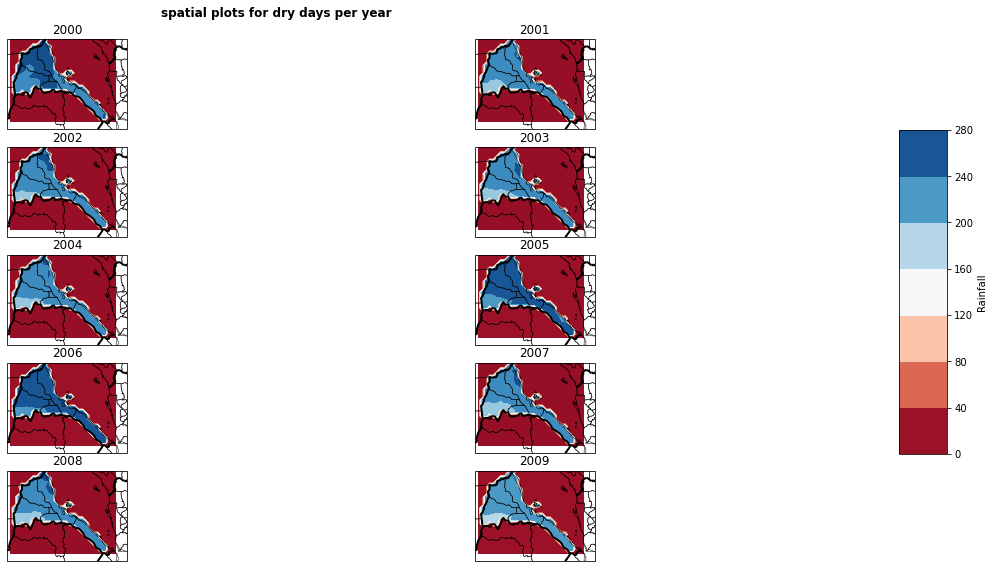

In [18]:
# spatial plots for dry days per year
fig,ax=plt.subplots(5,2,figsize=(27,9), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([36.0, 44.0, 12.0, 18.0])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(dryDays_per_year.lon, dryDays_per_year.lat, dryDays_per_year[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Rainfall')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for dry days per year', fontweight='bold');
plt.savefig('8.jpeg');

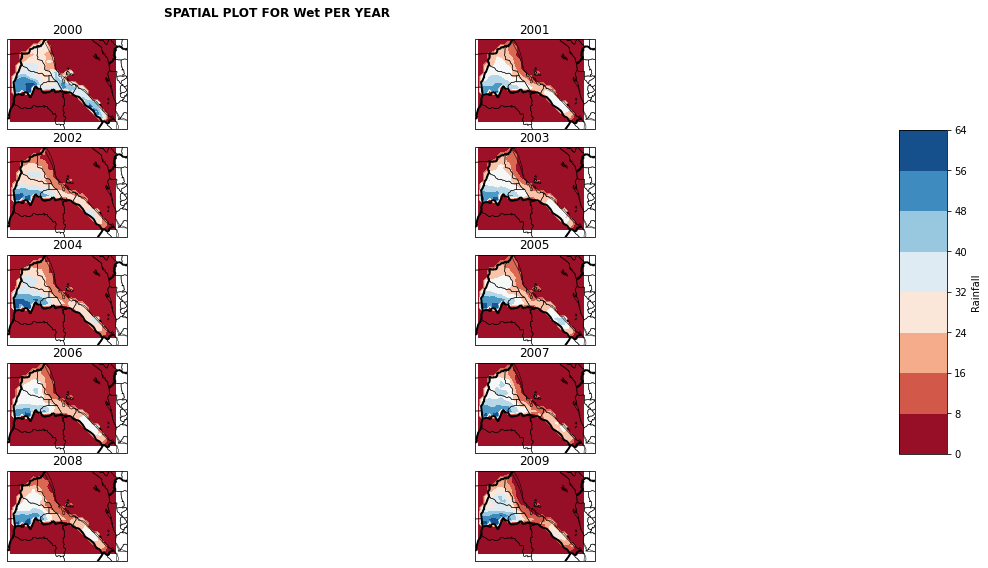

In [19]:
# spatial plots for wet days per year
fig,ax=plt.subplots(5,2,figsize=(27,9), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([36.0, 44.0, 12.0, 18.0])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(wetDays_per_year.lon, wetDays_per_year.lat, wetDays_per_year[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Rainfall')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL PLOT FOR Wet PER YEAR', fontweight='bold');
plt.savefig('9.jpeg');

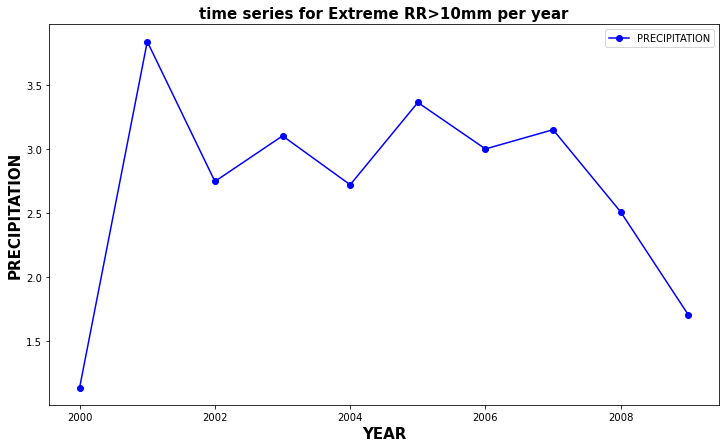

In [20]:
#plotting time series for xtremerr>10mm per year
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xrain10.year,Xrain10.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
ax.set_title('time series for Extreme RR>10mm per year', fontweight = 'bold', fontsize=15 ,color = 'Black')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 15, color= 'Black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'Black')
plt.legend()
# plt.show()
plt.savefig('10.jpeg');

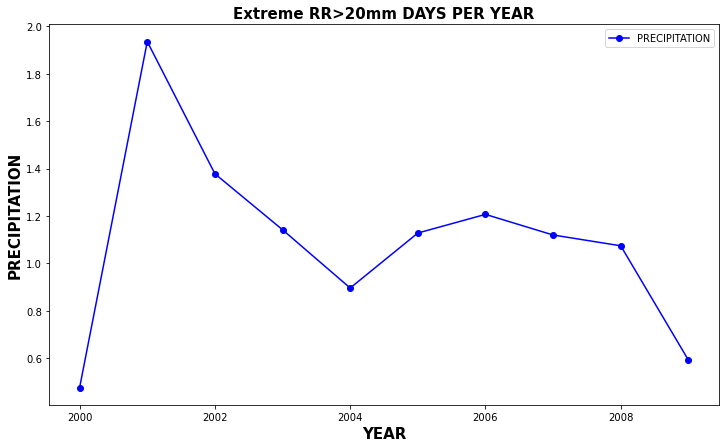

In [21]:
#plotting time series for xtremerr>20mm per year
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xrain20.year,Xrain20.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
ax.set_title('Extreme RR>20mm DAYS PER YEAR', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'Black')
plt.legend()
# plt.show()
plt.savefig('11.jpeg');

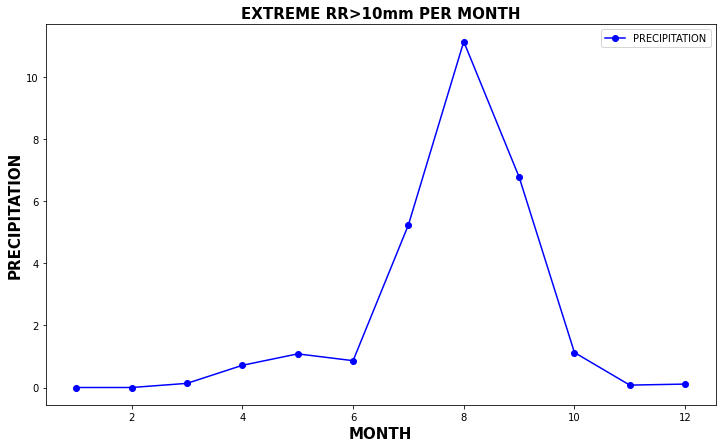

In [24]:
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xrain10M.month,Xrain10M.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
ax.set_title('EXTREME RR>10mm PER MONTH', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("MONTH", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
# plt.show()
plt.savefig('12.jpeg');

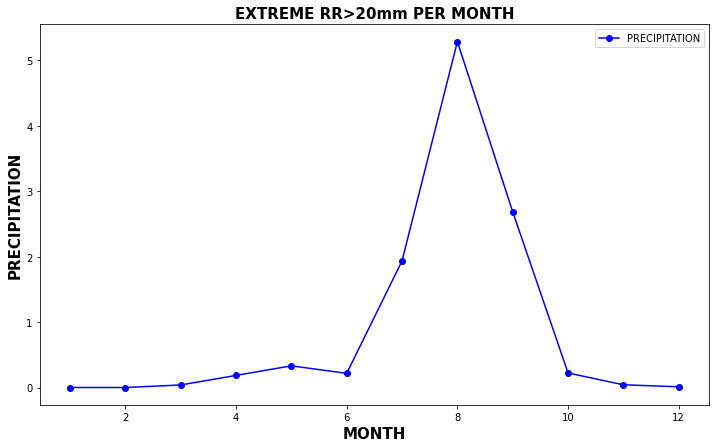

In [25]:
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xrain20M.month,Xrain20M.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
ax.set_title('EXTREME RR>20mm PER MONTH', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("MONTH", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
# plt.show()
plt.savefig('13.jpeg');

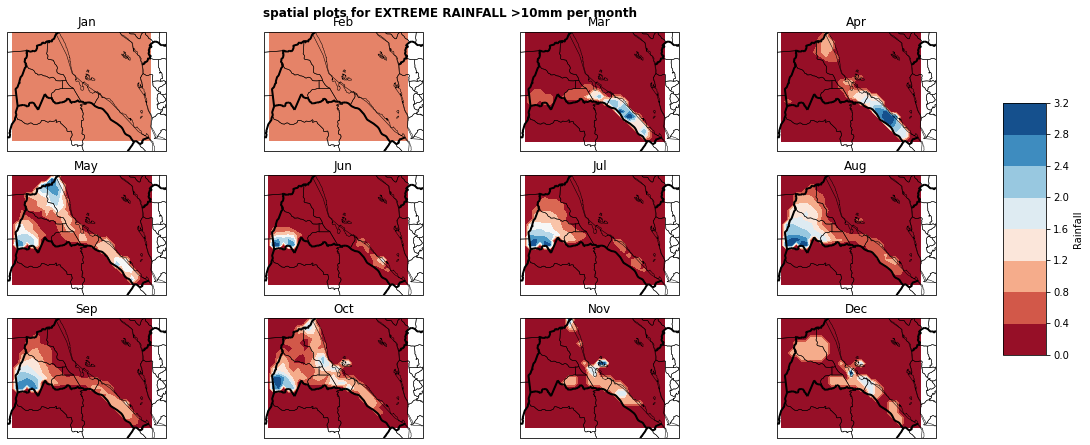

In [30]:
# spatial plots for XTREME RAINFALL >10mm per month
fig,ax=plt.subplots(3,4,figsize=(24,7), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([36.0, 44.0, 12.0, 18.0])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(Xrain10M.lon, Xrain10M.lat, Xrain10M[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Rainfall')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for EXTREME RAINFALL >10mm per month', fontweight='bold');
plt.savefig('14.jpeg');

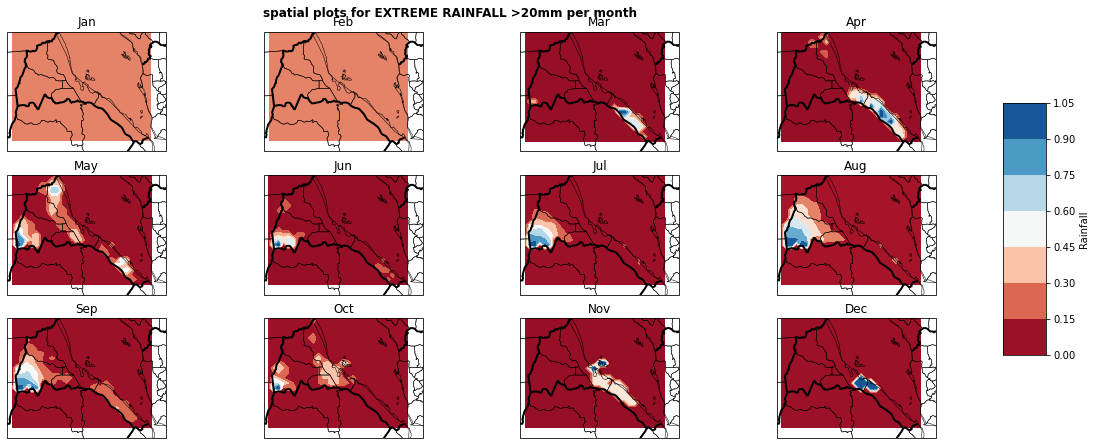

In [31]:
# spatial plots for XTREME RAINFALL >20mm per month
fig,ax=plt.subplots(3,4,figsize=(24,7), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([36.0, 44.0, 12.0, 18.0])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(Xrain20M.lon, Xrain20M.lat, Xrain20M[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Rainfall')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for EXTREME RAINFALL >20mm per month', fontweight='bold');
plt.savefig('15.jpeg');

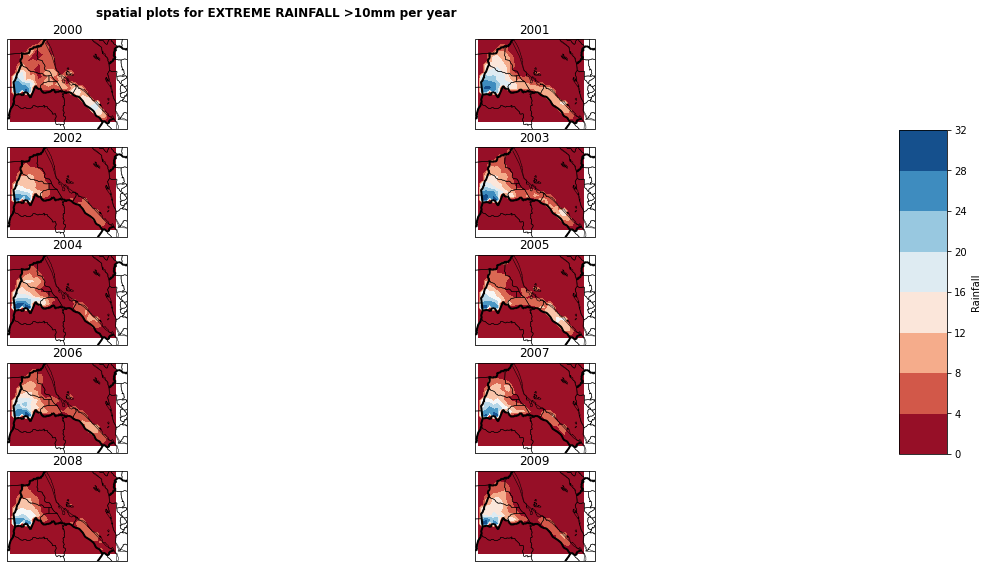

In [34]:
# spatial plots for XTREME RAINFALL >10mm per year
fig,ax=plt.subplots(5,2,figsize=(27,9), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([36.0, 44.0, 12.0, 18.0])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(Xrain10.lon, Xrain10.lat, Xrain10[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Rainfall')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for EXTREME RAINFALL >10mm per year', fontweight='bold');
plt.savefig('16.jpeg');

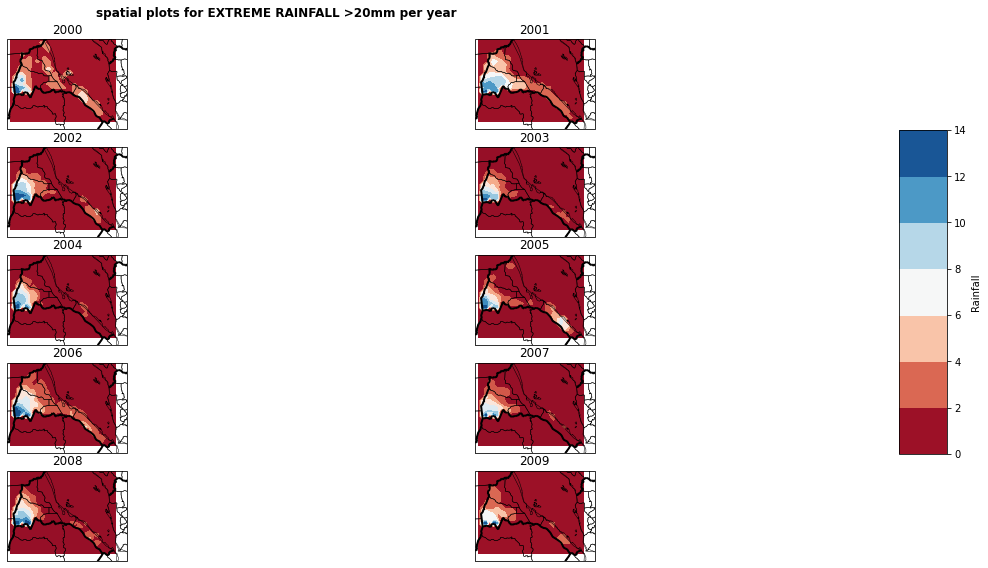

In [35]:
# spatial plots for XTREME RAINFALL >20mm per year
fig,ax=plt.subplots(5,2,figsize=(27,9), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([36.0, 44.0, 12.0, 18.0])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(Xrain20.lon, Xrain20.lat, Xrain20[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Rainfall')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for EXTREME RAINFALL >20mm per year', fontweight='bold');
plt.savefig('17.jpeg');